In [99]:
import keras

In [100]:
# CNN data set paths
paths =['dogImages/test/', 'dogImages/train/', 'dogImages/valid/', 
        'bottleneck_features', 
        'images/']

# Data for HAAR Cascades classifier
haarcascades_xml='haarcascade_frontalface_alt.xml'

IMG_DIMS = 150


In [101]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(IMG_DIMS, IMG_DIMS, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=64, kernel_size=3, padding='valid',  activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(133, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
dropout_47 (Dropout)         (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
dropout_48 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 14, 14, 128)       73856     
__________

In [102]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

In [103]:
# Set-up constants

batch_size = 32

In [104]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # Required to fix truncation errors

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
        paths[1],  # this is the target directory
        target_size=(IMG_DIMS , IMG_DIMS),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        paths[2],
        target_size=(IMG_DIMS, IMG_DIMS),
        batch_size=batch_size,
        class_mode='categorical')

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


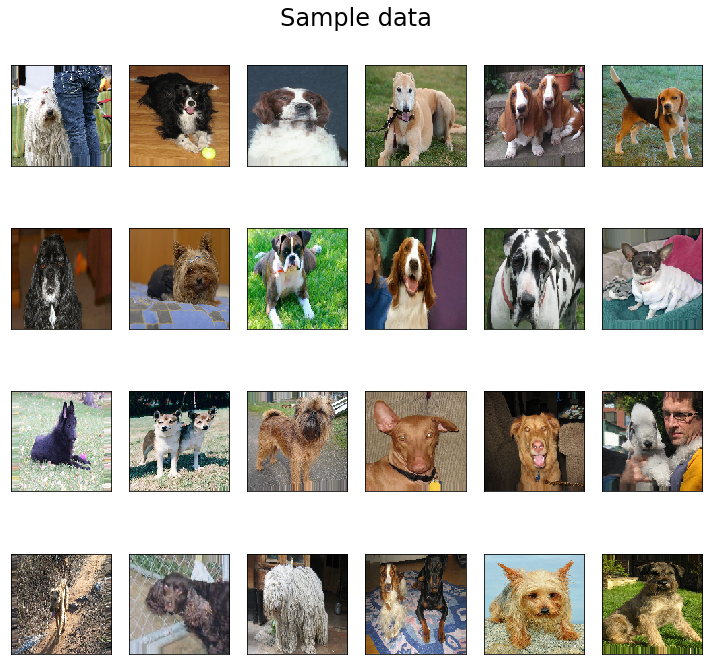

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_images(img_gen, title):
    fig, ax = plt.subplots(4, 6, figsize=(10, 10))
    plt.suptitle(title, size=24)
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    for (imgs, labels) in img_gen:
        for i in range(4):
            for j in range(6):
                if i*6 + j < 24:
                    ax[i][j].imshow(imgs[i*6 + j])
        break 

plot_images(train_generator, 'Sample data')

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=50, 
        callbacks=[checkpointer])

Epoch 1/50
62/62 [==============================] - 27s - loss: 4.8899 - acc: 0.0076 - val_loss: 4.8841 - val_acc: 0.0102
Epoch 2/50
62/62 [==============================] - 23s - loss: 4.8816 - acc: 0.0096 - val_loss: 4.8723 - val_acc: 0.0117
Epoch 3/50
62/62 [==============================] - 23s - loss: 4.8798 - acc: 0.0106 - val_loss: 4.8705 - val_acc: 0.0156
Epoch 4/50
62/62 [==============================] - 23s - loss: 4.8626 - acc: 0.0148 - val_loss: 4.8379 - val_acc: 0.0220
Epoch 5/50
62/62 [==============================] - 23s - loss: 4.8266 - acc: 0.0141 - val_loss: 4.8191 - val_acc: 0.0240
Epoch 6/50
62/62 [==============================] - 23s - loss: 4.7949 - acc: 0.0176 - val_loss: 4.7958 - val_acc: 0.0233
Epoch 7/50
62/62 [==============================] - 24s - loss: 4.7520 - acc: 0.0235 - val_loss: 4.7481 - val_acc: 0.0246
Epoch 8/50
62/62 [==============================] - 23s - loss: 4.6926 - acc: 0.0202 - val_loss: 4.7263 - val_acc: 0.0324
Epoch 9/50
62/62 [======

62/62 [==============================] - 27s - loss: 3.6111 - acc: 0.1542 - val_loss: 3.9434 - val_acc: 0.1102
Epoch 31/50
62/62 [==============================] - 26s - loss: 3.5813 - acc: 0.1583 - val_loss: 3.8949 - val_acc: 0.1258
Epoch 32/50
62/62 [==============================] - 26s - loss: 3.5273 - acc: 0.1562 - val_loss: 3.9407 - val_acc: 0.1077
Epoch 33/50
62/62 [==============================] - 26s - loss: 3.5111 - acc: 0.1588 - val_loss: 3.8041 - val_acc: 0.1479
Epoch 34/50
62/62 [==============================] - 26s - loss: 3.4402 - acc: 0.1737 - val_loss: 3.7687 - val_acc: 0.1420
Epoch 35/50
62/62 [==============================] - 25s - loss: 3.3653 - acc: 0.1890 - val_loss: 3.7848 - val_acc: 0.1543
Epoch 36/50
62/62 [==============================] - 25s - loss: 3.3888 - acc: 0.1835 - val_loss: 3.8186 - val_acc: 0.1375
Epoch 37/50
62/62 [==============================] - 25s - loss: 3.3905 - acc: 0.1815 - val_loss: 3.7426 - val_acc: 0.1547
Epoch 38/50
62/62 [=========

In [86]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [88]:
# get predictions on the test set
test_set_datagen = ImageDataGenerator(rescale=1./255)
# this is a similar generator, for validation data
test_generator = test_set_datagen.flow_from_directory(
        paths[0],
        target_size=(IMG_DIMS, IMG_DIMS),
        batch_size=batch_size,
        class_mode='categorical')

paths[0]

Found 836 images belonging to 133 classes.


'dogImages/test/'

In [90]:
# Prepare the test data

x = []
y = []

i = 0
for (imgs, labels) in test_generator:
    if i< 26:
        x.append(imgs[i])
        y.append(labels[i])
        i += 1
    else:
        break
        
test_generator.samples
xa = np.asarray(x)
ya = np.asarray(y)


In [91]:
# Evaluate how well the model does

score = model.evaluate(xa,ya, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.192307695746
